**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import json
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [2]:
url = "https://raw.githubusercontent.com/StephenJudeD/Bank-Customer-Churn/main/bank_churn.csv"
#df = pd.read_csv(url,index_col=7)
df = pd.read_csv(url)

print(df.head(5))    

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
df
# loading dataset

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

**Exploratory Data Analysis**

In [4]:
df.shape
# There are 10,000 rows and 14 columns

(10000, 14)

In [5]:
# apply the dtype attribute
result = df.dtypes

print("Output:")
print(result)

Output:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
df.info()
# Checking the information of the data - same as above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Searching for Missings,type of data and also known the shape of data

print(df.info())

#Looking unique values
print(df.nunique())
#Looking the data
print(df.head())
# There are no null values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore   

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Exited'].value_counts()
# Exited—whether or not the customer left the bank.
# Targer column is imbalanced there are 7963 0's and 2037 1's 
# 1 is exited, 0 is stayed

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(df, title="Data Profile Report")
json_data = profile.to_json()
json_data = json.loads(json_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.describe()
# The describe function will display all the decriptive statistics of the data including mean, std, min, max values.

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

**Data Visualization**

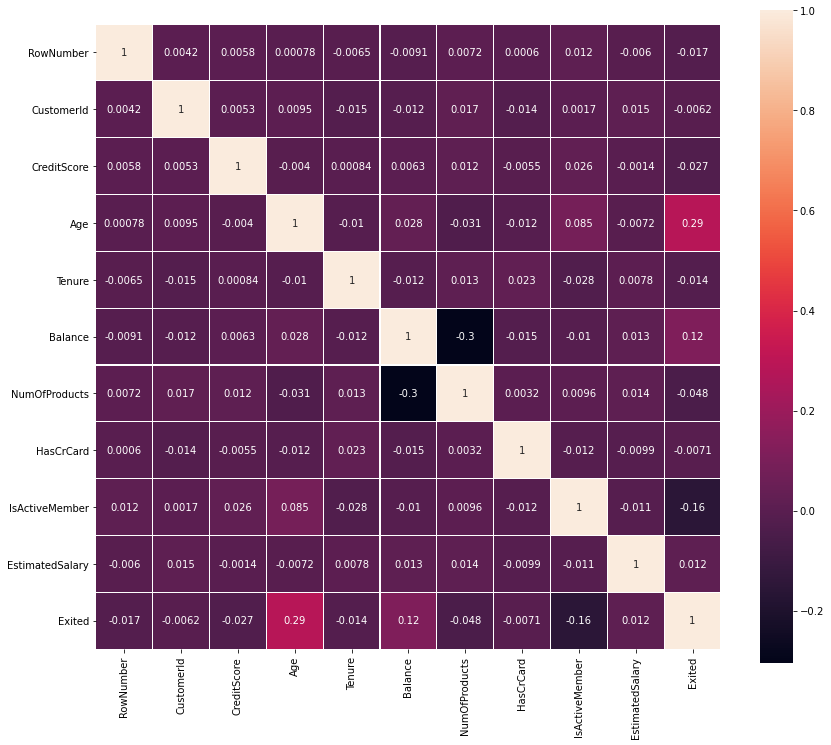

In [12]:
# creating a corr plot to help understand relationships
plt.figure(figsize=(14,12))
corr_plot = sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

#Overall, the correaltion is very weak.
#Weak positive correlation with age
#Very weak positive correlation with balance
#Very weak negative correlations with number of products and membership

<AxesSubplot:>

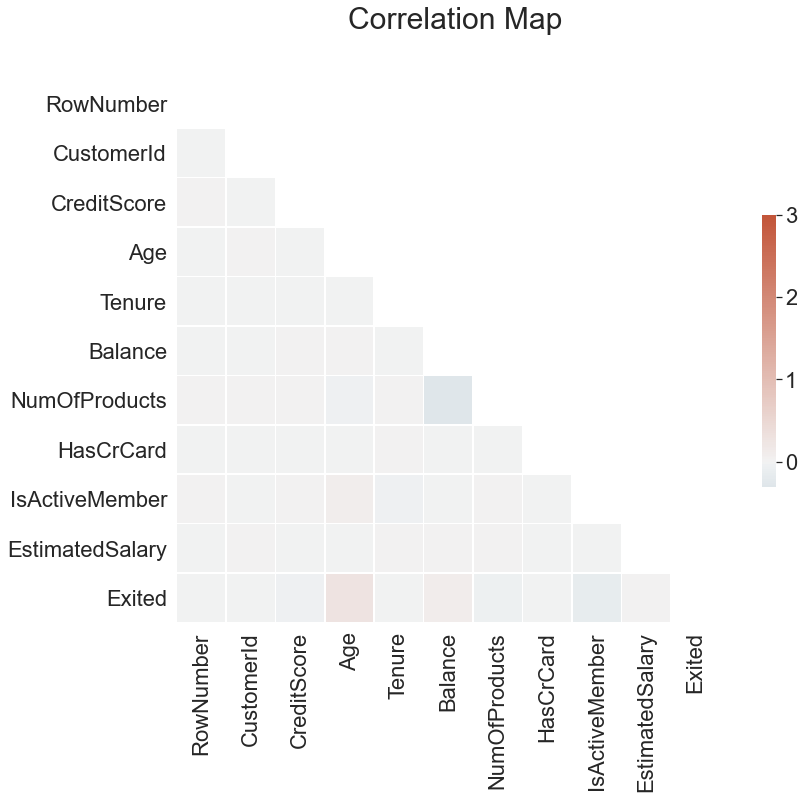

In [13]:
# another seaborn corr, different viewpoint - less detailed
sns.set(style="white", font_scale=2)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,10))
f.suptitle('Correlation Map', fontsize=30)

#cmap = sns.diverging_palette(220,10, as_cmap=True)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

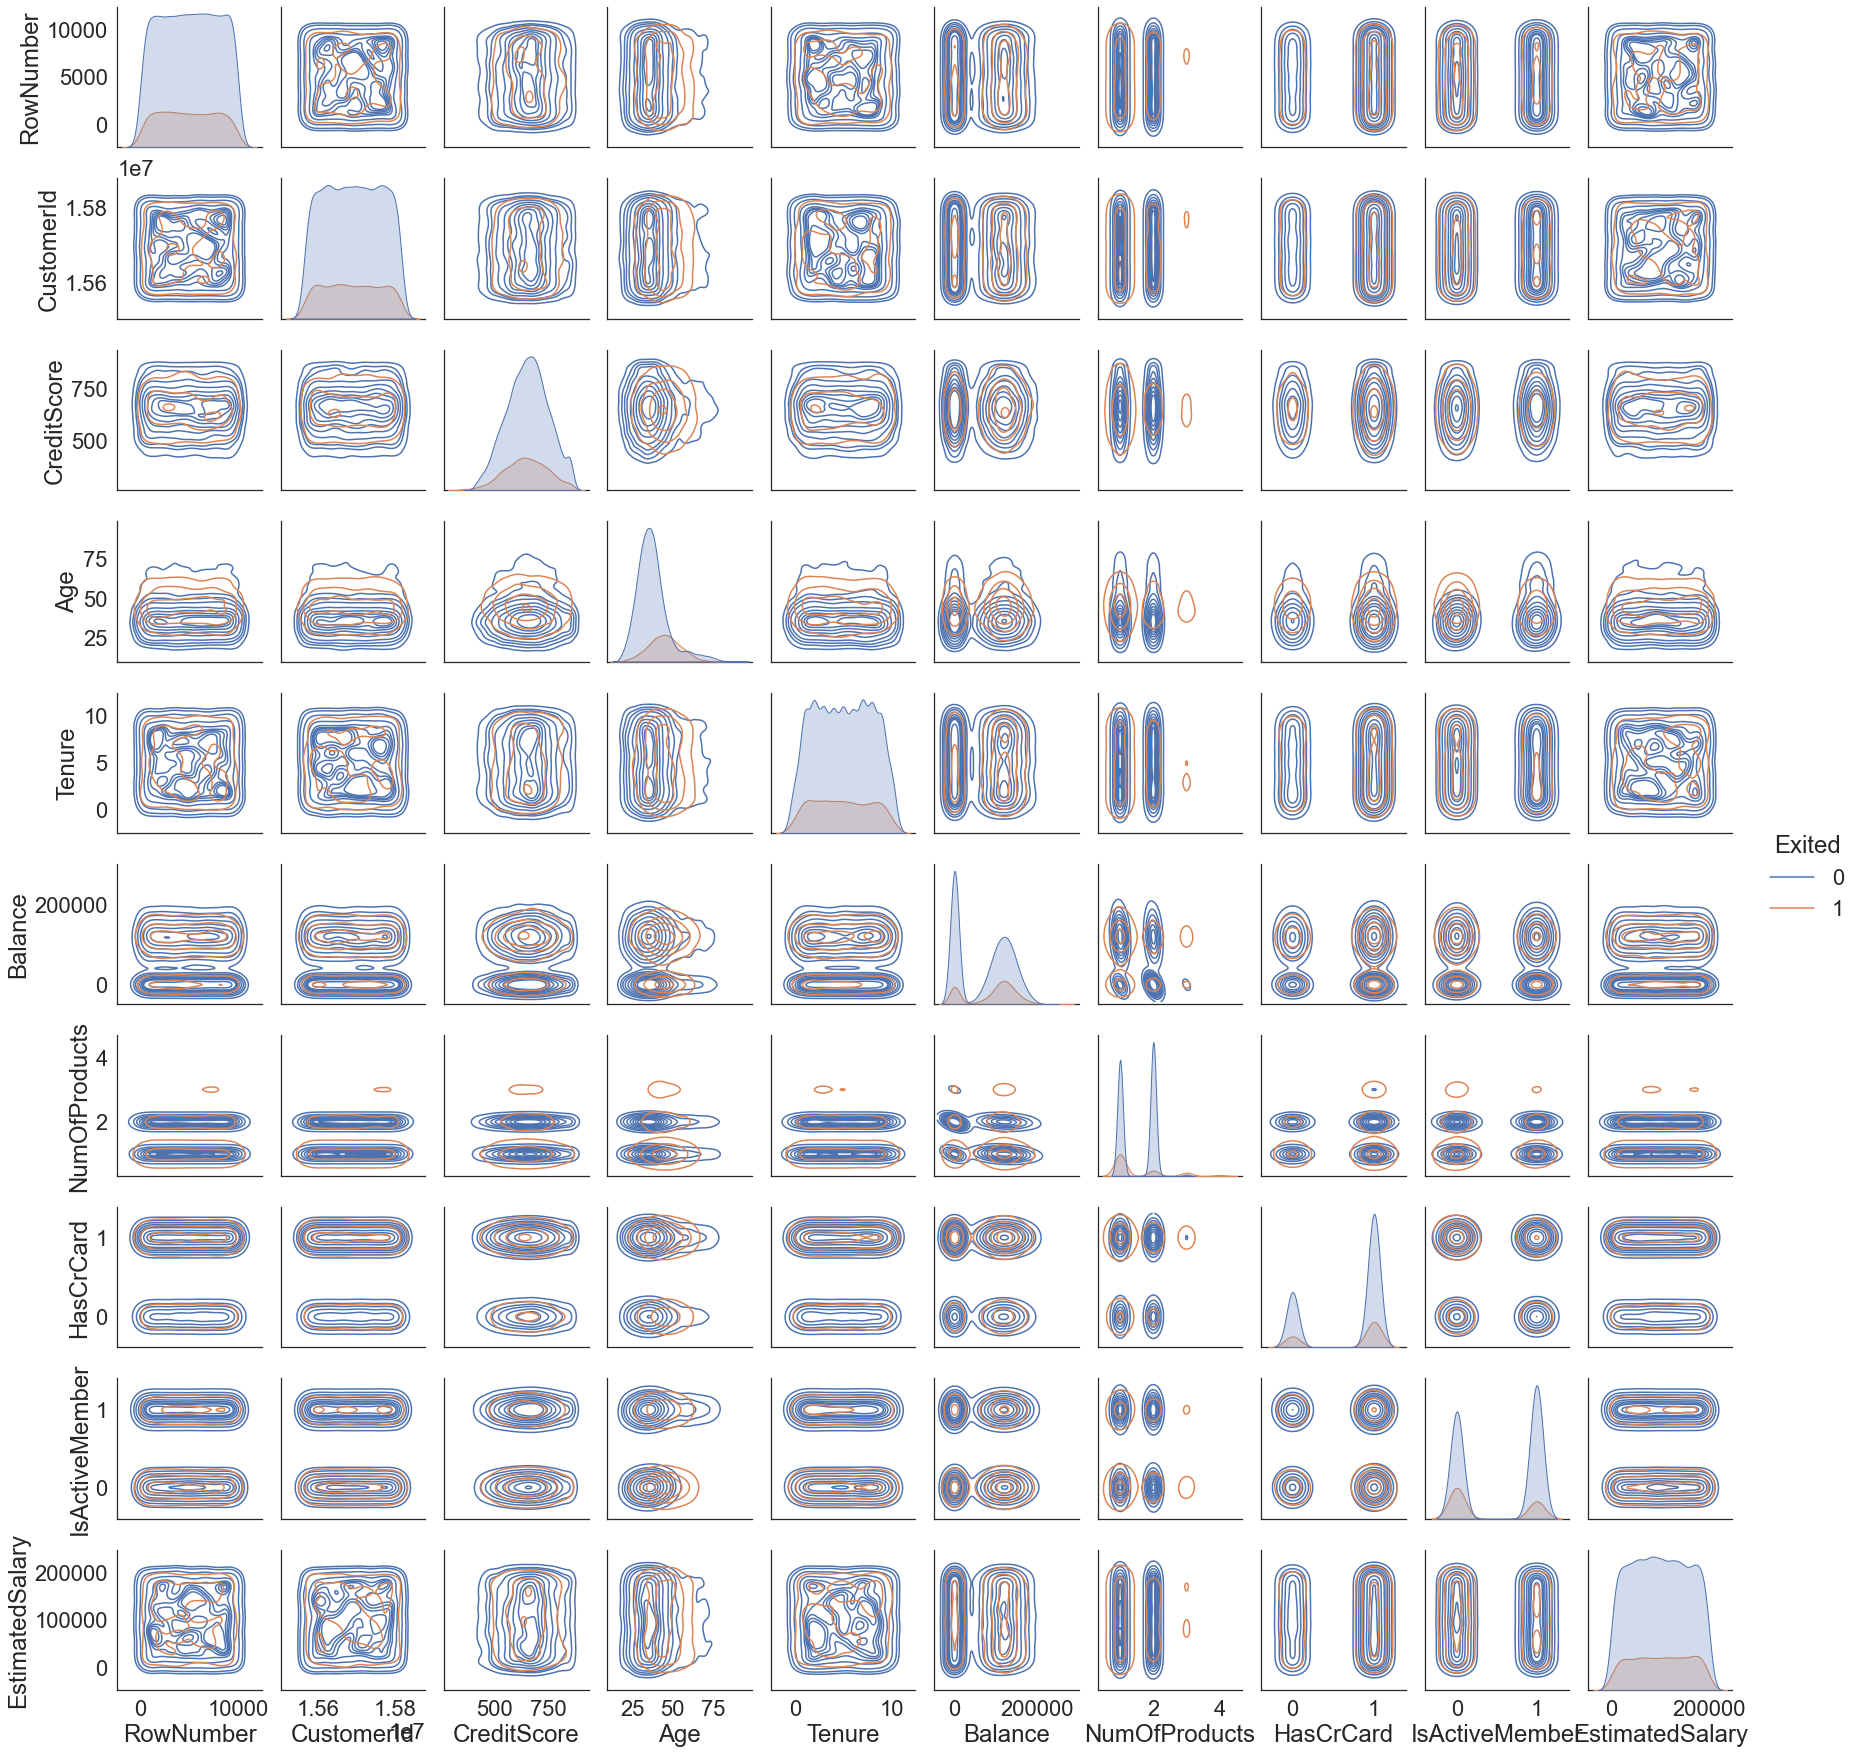

In [14]:
sns.pairplot(df, kind="kde", hue="Exited", palette = "deep")

# blue hue = Exited 0 (still a customer, stayed)
# Orange hue = Exited 1 (left, not longer a customer)

# Older people tend to stay 
# People with a better crid score tend to stay
# Estimated salary of people whi stay is higher

In [15]:
df.columns
# Displaying column names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df.head(5)
# Displaying the head of the dataset

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

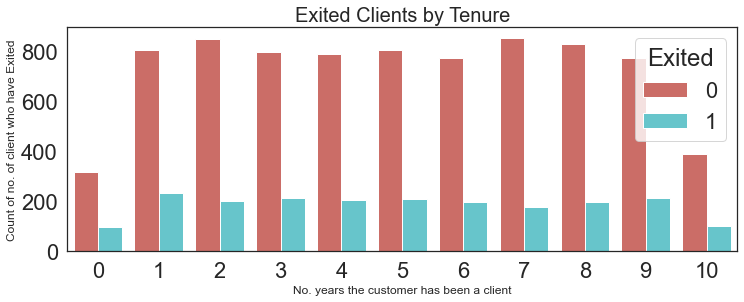

In [17]:
#Bar chart using Seaborn 
 
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Tenure", data=df, 
              palette="hls",  hue = "Exited")
g.set_xlabel("No. years the customer has been a client", fontsize=12)
g.set_ylabel("Count of no. of client who have Exited", fontsize=12)
g.set_title("Exited Clients by Tenure", fontsize=20)

plt.show()

# No real insights, pretty well correalated 

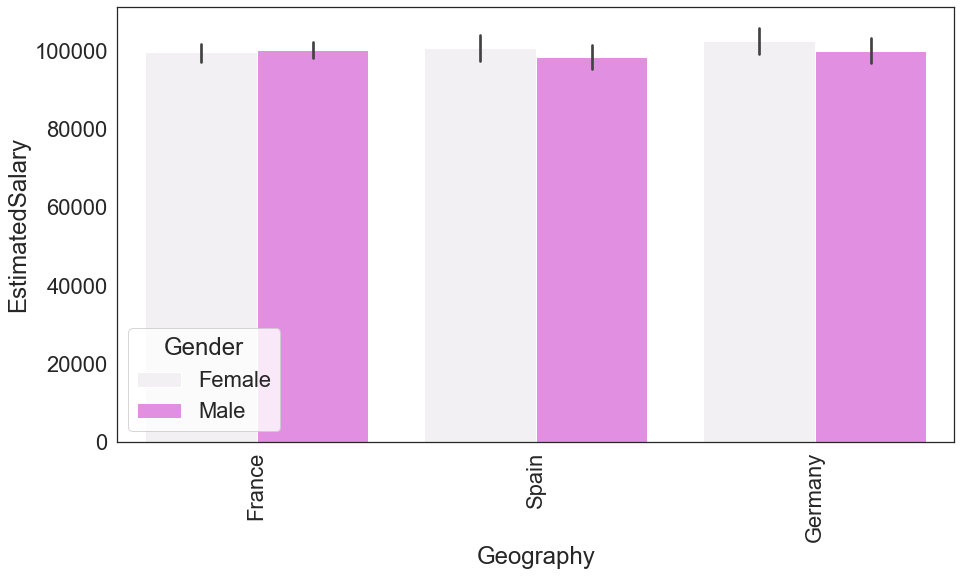

In [18]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender',color='violet',data=df);
# Visualizing barplot where Geography is on x-axis and estimated salary is on y axis and key is gender

Text(0.5, 21.92, 'Age')

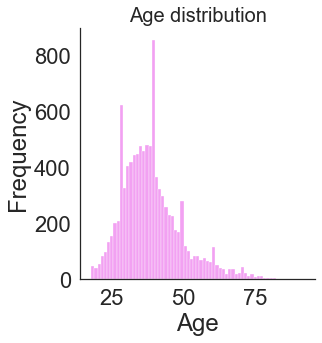

In [19]:
#Plot to see the distribution of a variable

sns.displot(df['Age'], color = 'violet')
plt.title('Age distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Age')

# Mean age 21.92

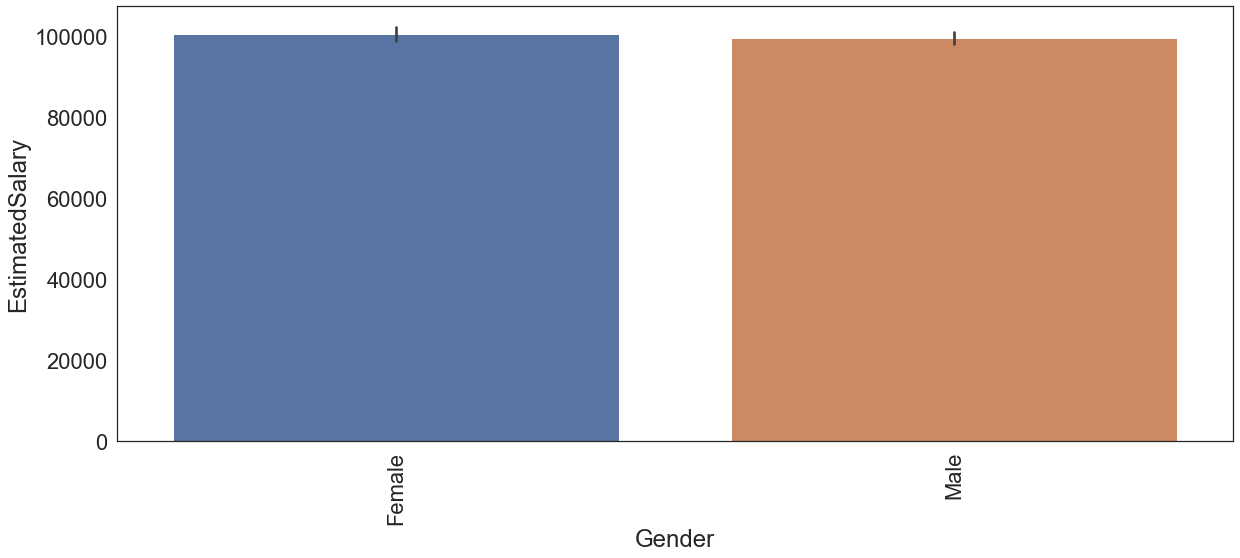

In [20]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='EstimatedSalary',data=df);
# Visualizing barplot where age is taken on x axis and estimated salary is taken on y axis

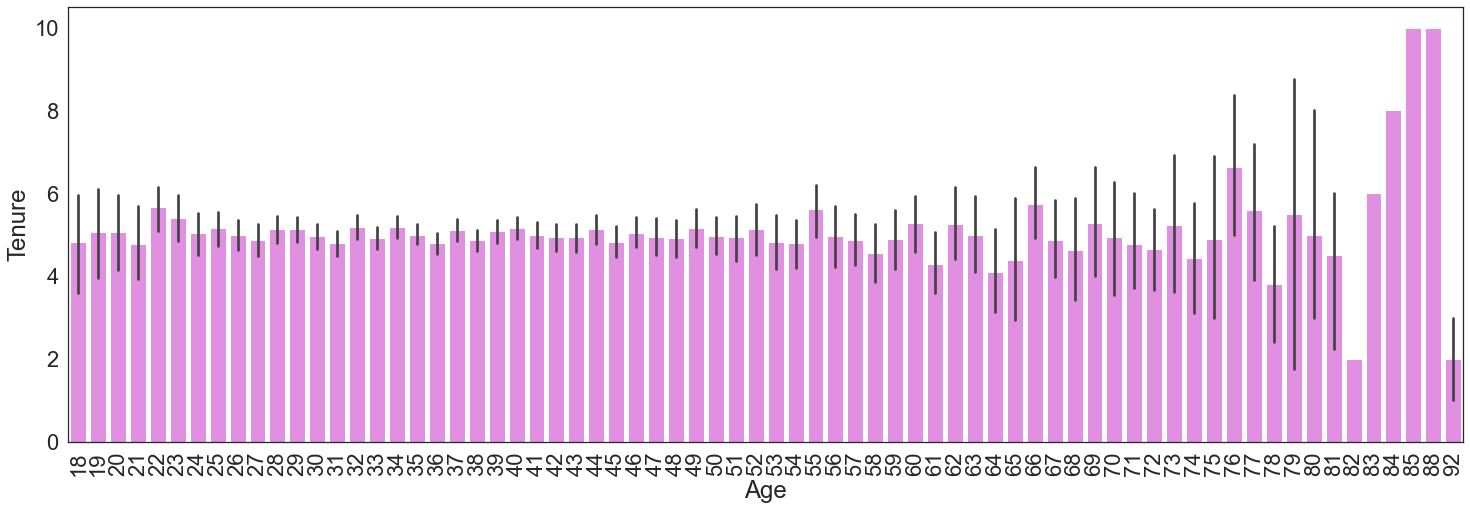

In [21]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Tenure',color='violet',data=df);
# Visualizing barplot where age is taken on x axis and exited in on y axis

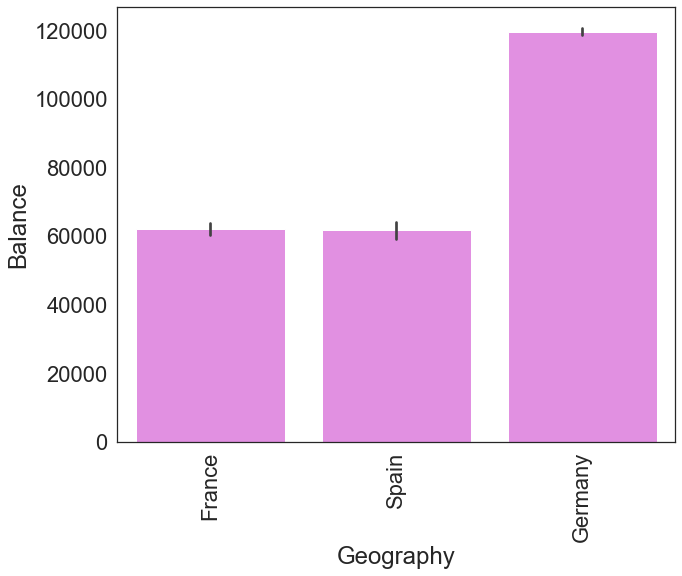

In [22]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='Balance',color='violet',data=df);
# Visualizing barplot where Geography is the x axis - Germans are the biggest savers?

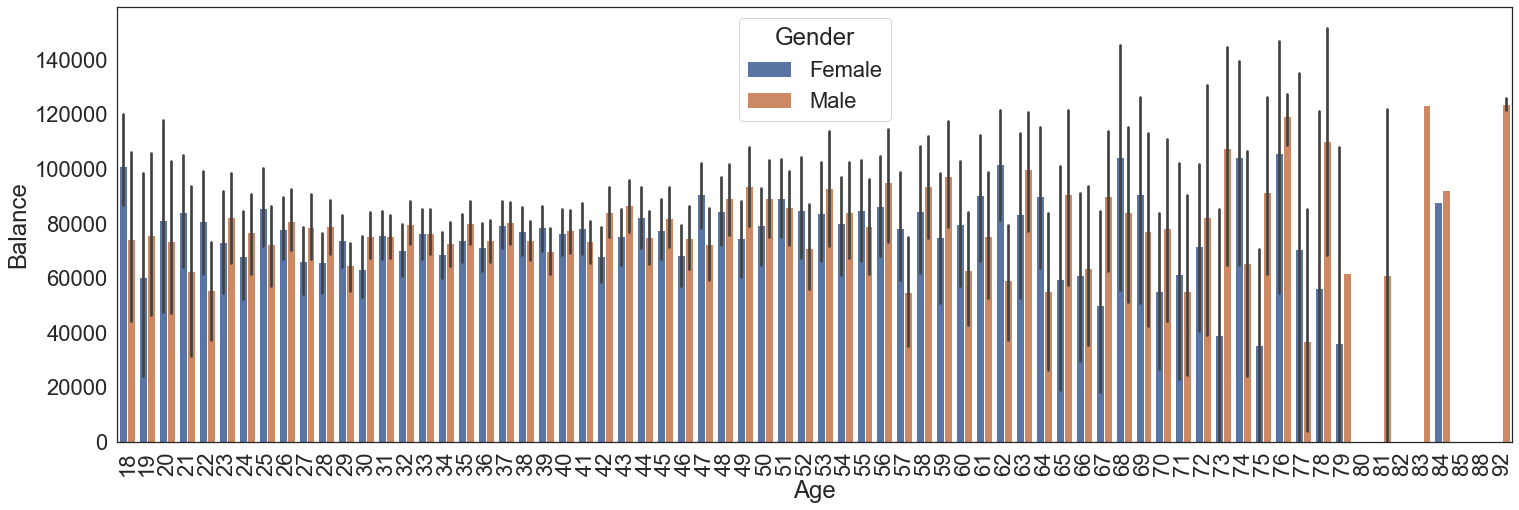

In [23]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Balance',hue='Gender',data=df);
# Visualizing barplot where Age is taken on x axis and EstimatedSalary is taken on y axis

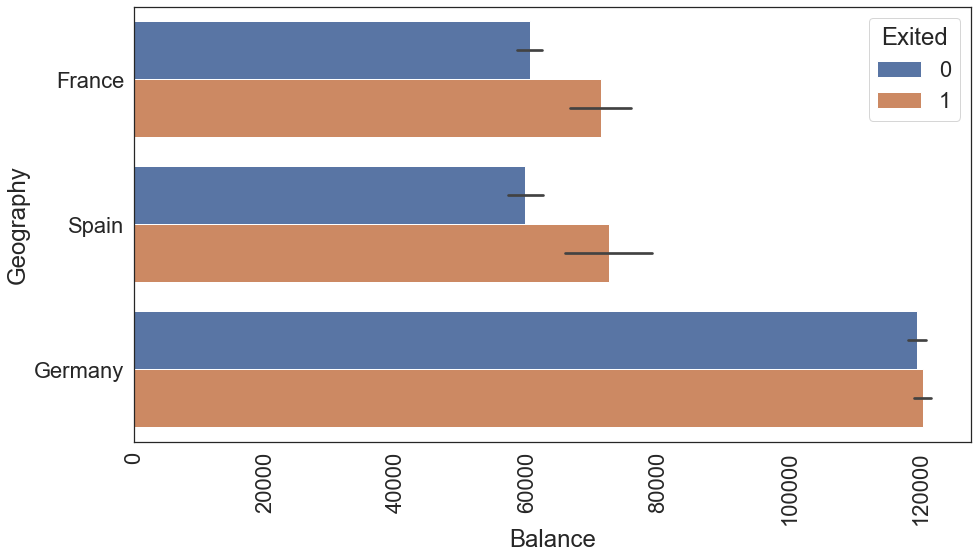

In [24]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Balance',y='Geography',hue='Exited',data=df);
# Visualizing barplot where Balance is taken on x axis and Geography is taken on y axis and key is Exited

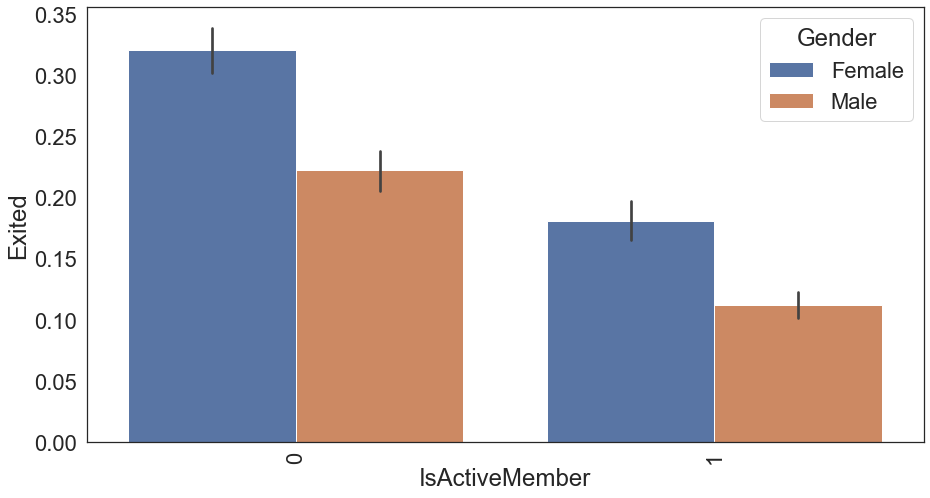

In [25]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Exited',hue='Gender',data=df);
# Visualizing barplot where IsActiveMember is taken on x axis and Exited is taken on y axis and key is gender

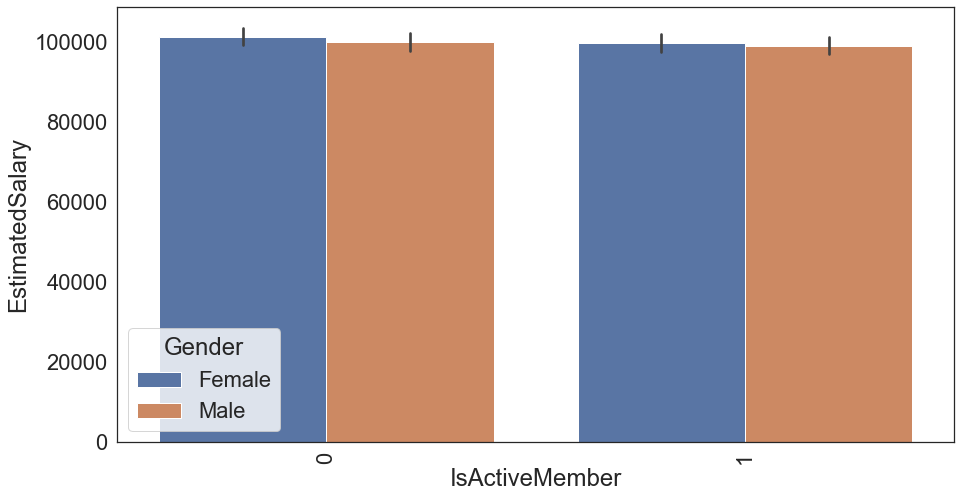

In [26]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df);
# Visualizing barplot where IsActiveMember is taken on x axis and EstimatedSalary is taken on y axis and key is gender

In [27]:
import joypy as joypy

<Figure size 1280x800 with 0 Axes>

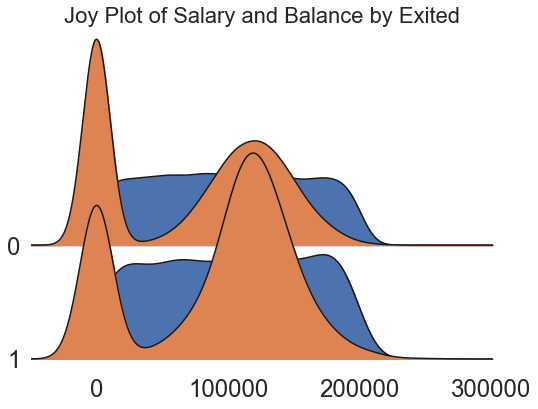

In [28]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['EstimatedSalary', 'Balance'], by="Exited", ylim='own', figsize=(8,6))

# Decoration
plt.title('Joy Plot of Salary and Balance by Exited', fontsize=22)
plt.show()

## Label Encoding 

In [29]:
cat_cols=['Geography','Gender']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes    
# We convert categorical data into numeric data with the help of label encoding

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
df.keys()
# displaying columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [31]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)
# dropping uneccessary columns and removing them from the dataset 

## DistributionPlot 

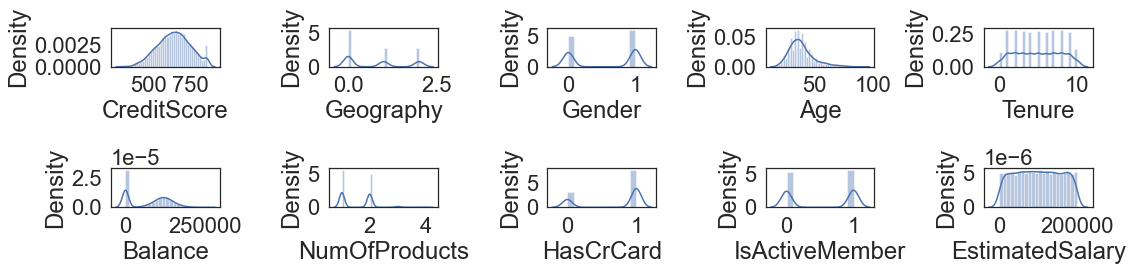

In [32]:
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
# Distribution plot will help us to check if the data is skewed or not

In [33]:
X=df.drop(labels=['Exited'],axis=1)
Y=df['Exited']
X.head()
# Splitting data into dependent and independent columns

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [34]:
Y.head()
# This is the target column

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# Splitting the data set into training and testing data

(8000, 10) (2000, 10) (8000,) (2000,)


**Algorithms - Decision Tree Classifier**

Some Notes

The kappa score is an interesting metric. Its origins are in the field of psychology: it is used for measuring the agreement between two human evaluators or raters (e.g., psychologists) when rating subjects (patients).This process of measuring the extent to which two raters assign the same categories or score to the same subject is called inter-rater reliability.

In our case this means is measure the class of Exited and how they relate to the categories.

See below, by using the same measurements such as ROC (probability of a binary outcome), confusion matrix (performance measurements) and predicitons we can campare alll ML Algos

### Decision Tree Classifier

In [36]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds3))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[6347    0]
 [   0 1653]]
confusion_matrix test is:  [[1616    0]
 [   0  384]]
Wrong predictions out of total
--------------------------------------------------
0 / 2000
--------------------------------------------------
KappaScore is:  1.0


**Decision Tree Classifier - Visualisation**

I also wanted to use an ML vis, and the most accessable for stakeholders in the DT Model

In [37]:
import os
os.environ["PATH"] += os.pathsep + (r'C:\Users\steph\Anaconda3\Library\bin\graphviz')

In [38]:
df

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [39]:
feature_cols = ['Age','Gender','Balance','NumOfProducts','IsActiveMember','EstimatedSalary','Tenure','HasCrCard','Geography','Exited']
X = df[feature_cols] # Features
y = df.Exited # Target variable

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('customer_churn.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.476071 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.476071 to fit



In [42]:
# far too many nodes, we will try and tune to create a better and more undewrstandle view

**Grid Search to Find Optimal Hyperparameters**

I will now use GridSearchCV to find multiple optimal hyperparameters together, scikit-Learn’s GridSearchCV will do the heavy lifting

In [43]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 7

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [44]:
#cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.016297      0.001122         0.001717        0.000453   
1        0.016144      0.000346         0.001860        0.000348   
2        0.015872      0.000721         0.001717        0.000453   
3        0.015324      0.000869         0.001371        0.000734   
4        0.022144      0.000704         0.001429        0.000495   
5        0.022042      0.000384         0.001307        0.000441   
6        0.019165      0.000378         0.001416        0.000427   
7        0.019242      0.000472         0.001663        0.000436   
8        0.012695      0.000513         0.001857        0.000350   
9        0.012786      0.000506         0.001451        0.000475   
10       0.012488      0.000514         0.001522        0.000467   
11       0.012609      0.000392         0.001907        0.000192   
12       0.017780      0.000343         0.001438        0.000506   
13       0.017599      0.000425         0.001518        0.000464   
14       0.015811      0.000400         0.001573        0.000496   
15       0.016107      0.000480         0.001380        0.000449   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.839020           0.835521           0.843395   
1            0.839020           0.835521           0.843395   
2            0.834646           0.835521           0.838145   
3            0.834646           0.835521           0.838145   
4            0.826772           0.829396           0.864392   
5            0.826772           0.829396           0.

In [45]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8417504072936592
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [46]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 50,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=50)

In [47]:
# accuracy score
clf_entropy.score(X_test,Y_test)

0.8615

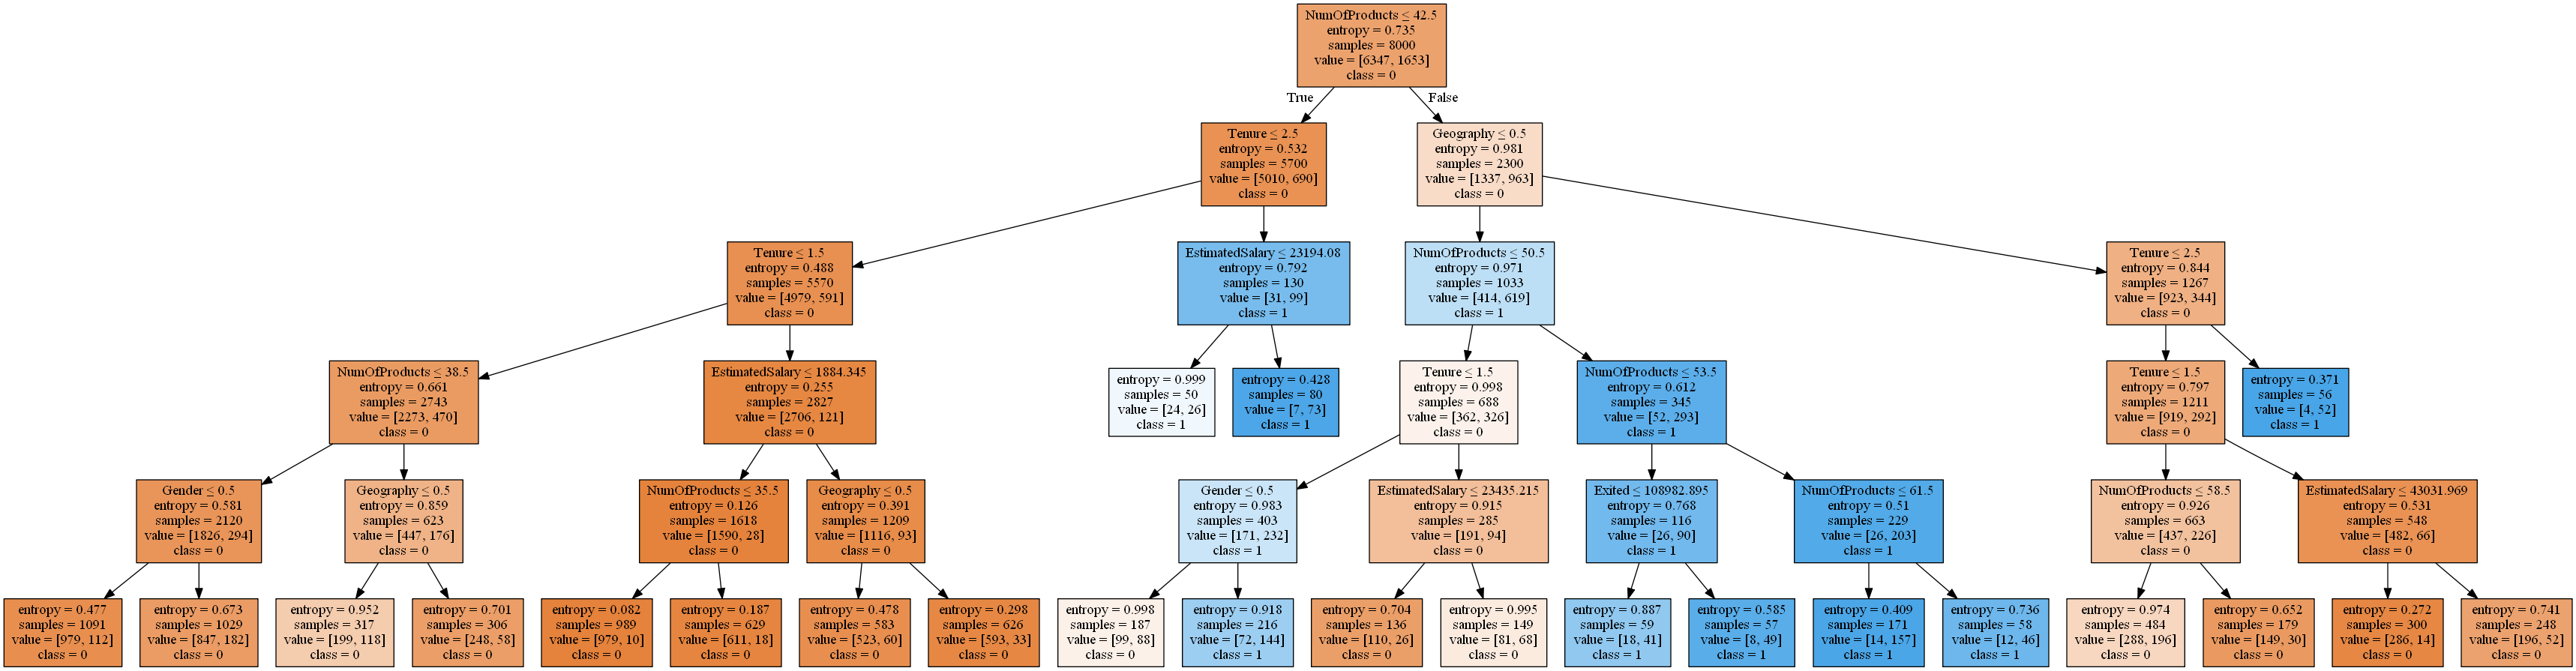

In [48]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn_entropy_5.png')
Image(graph.create_png())